In [10]:
! pwd
! pip uninstall sympytorch -y

/share_zeta/Proxy-Sim/PhysicsSimulationDeepLearning


Found existing installation: sympytorch 0.1.4
Uninstalling sympytorch-0.1.4:
  Successfully uninstalled sympytorch-0.1.4


In [ ]:
import os
import sys


#ROOT="/home/guillermo.carrilho/PhysicsSimulationDeepLearning"
#ROOT="/share_zeta/Proxy-Sim/PhysicsSimulationDeepLearning"
ROOT=".."

sys.path.append(os.path.join(ROOT,"Physical_models"))

Equation solve by this algorithm is:
$$\textbf{u}=-\frac{\textbf{k}}{\mu}(\nabla p - \rho g)$$

### The case of this implementation is

$$\phi \frac{\partial p}{\partial t} - \frac{1}{\mu} \nabla \cdot (\textbf{k} \nabla p) = q$$

# stable fluids approach

Equation solve by this algorithm is:
$$\textbf{u}=-\frac{\textbf{k}}{\mu}(\nabla p - \rho g)$$

### The case of this implementation is

$$\phi \frac{\partial p}{\partial t} - \frac{1}{\mu} \nabla \cdot (\textbf{k} \nabla p) = q$$

In [3]:
#from Differentiable_simulation import dK_w,K_w,K_o,grad_phi_dK
from phi.torch.flow import *
from phi.torch.flow import diffuse, advect, Solve, fluid, math,Field, unstack,stack,batch,field,vec

class darcy_flow_model(object):
  def __init__(self,field,dt):
    self.field=field
    self.dt=dt

  def nK(self,domain):
    return 0.001*math.exp(-math.sum(((domain.center-0.5)**2),"vector")/(2*0.5))

  def reaction_diffusion(self, u, dt):
    su = self.nK(u.geometry) * field.laplace(u)
    return u + dt * su
  def step(self,v):
    return self.reaction_diffusion(v,self.dt)
  
args={"k":0.1}
  

geo=UniformGrid(x=60, y=60,bounds=Box(x=1.0, y=1.0))
phi_w=Field( geo,values=vec(x=0.0,y=0.0),
      boundary= {
          'x-': vec(x=0.1,y=0.0),
          'x+': ZERO_GRADIENT,
          'y-': 0,
          'y+': 0
 })

#phy=physical_model(
#   phi_w,0.01
#)

## 2D

In [9]:
geo=UniformGrid(x=20, y=20,bounds=Box(x=1.0, y=1.0))
phi_w=Field( geo,values=tensor(0.0),
      boundary= {
          'x-': tensor(0.01),
          'x+': ZERO_GRADIENT,
          'y-': 0,
          'y+': 0
 })
phi_w
model=darcy_flow_model()

TypeError: darcy_flow_model.__init__() missing 2 required positional arguments: 'field' and 'dt'

In [3]:
class simple_cnn_model(torch.nn.Module):
  def __init__(self):
    super(simple_cnn_model,self).__init__()

    self.conv1=torch.nn.Conv2d(2, 32, (9,9), padding=4)
    self.conv2=torch.nn.Conv2d(32, 64, (9,9), padding=4)
    self.conv3=torch.nn.Conv2d(64, 2, (9,9), padding=4)
    self.act1=torch.nn.ReLU()
    self.act2=torch.nn.ReLU()
    self.act3=torch.nn.Tanh()
  def forward(self,x):
    x=self.act1(self.conv1(x))
    x=self.act2(self.conv2(x))
    x=self.act3(self.conv3(x))*1
    #x=torch.clamp(x, min=-0.5, max=0.5)
    return x[0]

In [4]:
model=simple_cnn_model().train()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)

In [12]:
v,p = fluid.make_incompressible(v0,solve=Solve('CG-adaptive',1e-2,1e-2))

NameError: name 'v0' is not defined

In [14]:
from Train_differentiable_physics import PINNS_based_SOL_trainer
import torch
T=PINNS_based_SOL_trainer(
    field=(v0,fluid.make_incompressible(v0,solve=Solve('CG-adaptive',1e-2,1e-2))[-1]),
    model=model,
    optimizer=optimizer,
    simulation_steps=2,
    time_step=0.1,
    loss=torch.mean
    )

In [16]:
from random import randint
randint()

TypeError: Random.randint() missing 2 required positional arguments: 'a' and 'b'

In [15]:
T.train(5)

[array(0.5626921, dtype=float32),
 array(-0.45075464, dtype=float32),
 array(-0.6038111, dtype=float32),
 array(-0.64447063, dtype=float32),
 array(-0.6510437, dtype=float32)]

## 3D

/usr/local/lib/python3.10/dist-packages/phiml/math/_optimize.py:640: UserWarning: Possible rank deficiency detected. Matrix might be singular which can lead to convergence problems. Please specify using Solve(rank_deficiency=...).
  warnings.warn("Possible rank deficiency detected. Matrix might be singular which can lead to convergence problems. Please specify using Solve(rank_deficiency=...).")


Diverged: Solve diverged within 819 iterations using Φ-ML CG (PyTorch*)

In [13]:
boundary = {'x-': vec(x=1.0,y=0.0,z=0.0),
            'x+': ZERO_GRADIENT,
            'y-':0,
            'y+':0,
            'z-':0,
            'z+':0
            }
boundary
geo=UniformGrid(x=128, y=128,z=128,bounds=Box(x=50, y=50,z=50))
v0=Field(geo,values=vec(x=tensor(0.0),y=tensor(0.0),z=tensor(0.0)),boundary=boundary)

phys=darcy_flow_model(v0,dt=0.1,
                    #advection_solver=(lambda v: Solve('CG-adaptive',1e-2,1e-2,x0=v)),projection_solver=Solve('CG-adaptive',1e-2,1e-2)
                    )

In [14]:
phys.step(v0)

Field[(xˢ=128, yˢ=128, zˢ=128, vectorᶜ=x,y,z)]

In [15]:
v0.geometry.

(xˢ=128, yˢ=128, zˢ=128), bounds=Box(x=(0, 50), y=(0, 50), z=(0, 50))

# Differentiable physics with PINNs

## Linear Darcy model

with
$$K(x)=\exp((p-p_0)^2)$$

### 2D

#### Solver

In [9]:
from phi.torch.flow import *
class darcy_flow_model(object):
  def __init__(self,field,dt):
    self.field=field
    self.dt=dt

  def nK(self,domain):
    return 0.001*math.exp(-math.sum(((domain.center-0.5)**2),"vector")/(2*0.5))

  def reaction_diffusion(self, u, dt):
    su = self.nK(u.geometry) * field.laplace(u)
    return u + dt * su
  def step(self,v):
    return self.reaction_diffusion(v,self.dt)
args={"k":0.1}


In [10]:
geo=UniformGrid(x=20, y=20,bounds=Box(x=1.0, y=1.0))
phi_w=Field( geo,values=tensor(0.0),
      boundary= {
          'x-': tensor(0.01),
          'x+': ZERO_GRADIENT,
          'y-': 0,
          'y+': 0
 })
phi_w



model=darcy_flow_model(phi_w,0.1)

In [11]:
phi_w.geometry.center.native("x,y").shape

torch.Size([20, 20, 2])

In [5]:
PHI=[]
for i in range(100):
  phi_w=model.reaction_diffusion(phi_w,0.01)
  PHI.append(phi_w)

#### Solver in the loop

In [3]:
from Train_differentiable_physics_with_PINNs import PINNS_based_SOL_trainer

In [4]:
import torch


def derivatives(u,x,n):
    if n==0:
        return u
    else:
        du=torch.autograd.grad(u,x,
        grad_outputs=torch.ones_like(u).to(u.device),
        create_graph=True,
        retain_graph=True,
        allow_unused=True
        )[0]
    return derivatives(du,x,n-1)


def vector_jacobian(u,x):
    unit_vectors=torch.eye(u.shape[-1])
    jacobian_rows = [torch.autograd.grad(u, x, vec_.unsqueeze(0).unsqueeze(0).tile(u.shape[0],u.shape[1],1).to(u.device),
            create_graph=True,
            retain_graph=True,
            allow_unused=True)[0]
                     for vec_ in unit_vectors]
    return torch.stack(jacobian_rows,axis=2)


def vector_grad(u,x):
    unit_vectors=torch.eye(u.shape[-1])
    jacobian_rows = [torch.autograd.grad(u, x, vec_.unsqueeze(0).unsqueeze(0).tile(u.shape[0],u.shape[1],1).to(u.device),
            create_graph=True,
            retain_graph=True,
            allow_unused=True)[0]
                     for vec_ in unit_vectors]
    return torch.diagonal(torch.stack(jacobian_rows,axis=2),dim1=-2,dim2=-1)

def x_grad(u,x,i,n):
    """
    gradient of degree n wrt x for component i of u
    input:
    u and x are tensors with vectors object at dimension -1
    [b, n_vectors, vector_dimension]

    output:
    [b, n_vectors, input_vector_dimension]
    """
    I=torch.eye(u.shape[-1])

    u=torch.autograd.grad(u ,x,
            I[i].unsqueeze(0).unsqueeze(0).tile(u.shape[0],u.shape[1],1).to(u.device),
            create_graph=True,
            retain_graph=True,
            allow_unused=True)[0]
    if n > 1:
        for i in range(n-1):
            u=vector_grad(u,x)
    return u

In [5]:
import torch
from einops import rearrange
import matplotlib.pyplot as plt
from DL_models.PINNS.utils import *

class simple_cnn_model(torch.nn.Module):
  def __init__(self):
    super(simple_cnn_model,self).__init__()

    self.conv1=torch.nn.Conv2d(4, 32, (9,9), padding=4)
    self.conv2=torch.nn.Conv2d(32, 64, (9,9), padding=4)
    self.conv3=torch.nn.Conv2d(64, 1, (9,9), padding=4)
    self.act1=torch.nn.ReLU()
    self.act2=torch.nn.ReLU()
    self.act3=torch.nn.Tanh()
  def forward(self,x):
    x=self.act1(self.conv1(x))
    x=self.act2(self.conv2(x))
    x=self.act3(self.conv3(x))*0.01
    #x=torch.clamp(x, min=-0.5, max=0.5)
    return x
  

#class composed_loss(object):

#from DL_models.PINNS.utils import x_grad

def composed_loss(p,x):
  """
  u: [b x y p]
  x: [b x y (x y t)]
  """
  #p=rearrange(p,"b p x y-> b (x y) p")
  #x=rearrange(x,"b u x y-> b (x y) u")
  dpdt=x_grad(p,x,0,1)[...,2]
  lap_u=torch.sum(x_grad(p,x,0,2)[...,:2],axis=-1)
  k=0.001*torch.exp(
    -torch.sum(((x[...,:2]-torch.mean(x[...,:2]))**2),axis=(1,2))/(2*0.5))

  return torch.abs(torch.mean(dpdt-k*lap_u))

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:
st_model=simple_cnn_model().train()
optimizer=torch.optim.Adam(st_model.parameters(),lr=1e-4)

In [7]:
from random import randint
from Physical_models.Differentiable_simulation import Space2Tensor,Tensor2Space
from tqdm import tqdm


class PINNS_based_SOL_trainer(PINNS_based_SOL_trainer):
    
    def forward_prediction_correction_test(self):

      # FIELD FORMAT
      self.os_=self.v.geometry.center.native("x,y").shape
      # SQUARED TENSOR FORMAT
      XT=self.generate_postion_time_code(self.v,self.t)
      XTU=torch.concat((XT,Space2Tensor(self.v,self.geometry)),axis=1)

      # TABULAR TENSOR FORMAT
      states_pred=[rearrange(XTU,"b u x y-> b (x y) u").requires_grad_(True)]  # START OF FLUX
      XTUp_1,XTUp=self.correct(states_pred[-1])
      
      # OBS: correction is made in field forrmat, for no aparent reason (TODO: try to train in field format)
      states_in=[XTUp_1]
      states_corr=[XTUp]
      states_pred=[XTUp_1[:,:,-1:]+XTUp]

      # For steps in correction run (4 in example) (incidencia nos iniciais)
      for i in tqdm(range(self.n_steps_test)):
        
        # Step last in states_pred
        U_space=Tensor2Space(rearrange(states_pred[-1]," b (x y) u -> b u x y",x=self.os_[0],y=self.os_[1])[0],self.geometry)
        states_pred.append(self.ph_model.step(
          U_space
          ))
        #U_tensor=Space2Tensor(U_space,self.geometry)
        self.t=self.t+self.dt
        XT=self.generate_postion_time_code(U_space,self.t)
        XTU=torch.concat((XT,Space2Tensor(U_space,self.geometry)),axis=1)
        # GRAD HERE
        
        states_pred[-1]=rearrange(XTU,"b u x y-> b (x y) u")
        # Correct with model of last states_pred
        XTUp_1,XTUp=self.correct(states_pred[-1])

        states_in.append(XTUp_1)
        states_corr.append(XTUp)
        states_pred[-1]=XTUp_1[:,:,-1:]+XTUp

      return states_pred,states_corr,states_in
    
    def train(self,epochs):
      losses=[]
      for i in tqdm(range(epochs)):
        #tqdm.write(f"epoch {i}")
        co_batch=[]
        in_batch=[]
        for b in tqdm(range(20)):
          #tqdm.write(f"batch {b}")

          random_idx=randint(0,len(self.init_states_gt)-1)
          self.v=self.detach_field(self.init_states_gt[random_idx])
          self.t=self.T[random_idx]
          states_pred,states_corr,states_in=self.forward_prediction_correction()
          co_batch=co_batch+states_pred
          in_batch=in_batch+states_in

        loss=0
        for i,(u,x) in enumerate(zip(co_batch,in_batch)):
          sample_loss=self.loss(u,x)
          loss=loss+sample_loss

        #states_in=torch.concat(states_in,axis=0) # [B X Y U]
        #states_pred=torch.concat(states_pred,axis=0) # [B X Y U]
        #print("LOSS")
        #loss=self.loss(states_pred,states_in)


        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        loss=loss/self.n_steps
        losses.append(loss.cpu().detach().numpy())
      return losses
    
    def test(self,epochs, time_fine_frac,space_fine_frac):

      self.ph_model=self.physical_model_constructor(self.v.downsample(1/space_fine_frac),dt=self.dt)
      self.n_steps_test=int(self.n_steps*time_fine_frac)
      or_dt=self.ph_model.dt
      self.ph_model.dt=self.ph_model.dt/time_fine_frac
      self.dt=self.ph_model.dt/time_fine_frac
      self.st_model.eval()
      

      losses=[]
      for i in tqdm(range(epochs)):
        #tqdm.write(f"epoch {i}")
        co_batch=[]
        in_batch=[]
        for b in tqdm(range(20)):
          #tqdm.write(f"batch {b}")

          random_idx=randint(0,len(self.init_states_gt)-1)
          self.v=self.detach_field(self.init_states_gt[random_idx])
          self.t=self.T[random_idx]
          states_pred,states_corr,states_in=self.forward_prediction_correction_test()
          co_batch=co_batch+states_pred
          in_batch=in_batch+states_in

        loss=0
        for i,(u,x) in enumerate(zip(co_batch,in_batch)):
          sample_loss=self.loss(u,x)
          loss=loss+sample_loss

        loss=loss/self.n_steps_test
        losses.append(loss.cpu().detach().numpy())
      
      self.ph_model.dt=or_dt
      self.dt=or_dt
      return losses

In [12]:
T=PINNS_based_SOL_trainer(
    field=phi_w,
    physical_model=darcy_flow_model,
    statistical_model=st_model,
    optimizer=optimizer,
    simulation_steps=5,
    time_step=0.01,
    loss=composed_loss
)

In [13]:
from tqdm import tqdm
L_tr=[]
L_ts=[]

In [41]:

for i in tqdm(range(5)):
    print("train step")
    L_tr.append(T.train(1))
    print("test step")
    L_ts.append(T.test(1,time_fine_frac=0.5,space_fine_frac=0.5))
    tqdm.write(f"train {L_tr[-1]},test {L_ts[-1]}")

  0%|          | 0/5 [00:00<?, ?it/s]

train step













100%|██████████| 1/1 [00:27<00:00, 27.17s/it]


test step





100%|██████████| 2/2 [00:00<00:00, 62.66it/s]


100%|██████████| 2/2 [00:00<00:00, 64.27it/s]


100%|██████████| 2/2 [00:00<00:00, 65.76it/s]



100%|██████████| 2/2 [00:00<00:00, 65.82it/s]


100%|██████████| 2/2 [00:00<00:00, 64.68it/s]


100%|██████████| 2/2 [00:00<00:00, 64.94it/s]



100%|██████████| 2/2 [00:00<00:00, 64.52it/s]


100%|██████████| 2/2 [00:00<00:00, 65.79it/s]


100%|██████████| 2/2 [00:00<00:00, 64.50it/s]



100%|██████████| 2/2 [00:00<00:00, 65.48it/s]


100%|██████████| 2/2 [00:00<00:00, 65.71it/s]


100%|██████████| 2/2 [00:00<00:00, 65.68it/s]



100%|██████████| 2/2 [00:00<00:00, 65.21it/s]


100%|██████████| 2/2 [00:00<00:00, 65.56it/s]


100%|██████████| 2/2 [00:00<00:00, 65.54it/s]



100%|██████████| 2/2 [00:00<00:00, 66.16it/s]


100%|██████████| 2/2 [00:00<00:00, 64.20it/s]


100%|██████████| 2/2 [00:00<00:00, 65.74it/s]



100%|██████████| 2/2 [00:00<00:00, 63.59it/s]


 20%|██        | 1/5 [00:29<01:56, 29.06s/it]

train [array(0.00021457, dtype=float32)],test [array(0.00027442, dtype=float32)]
train step













100%|██████████| 1/1 [00:26<00:00, 26.72s/it]


test step





100%|██████████| 2/2 [00:00<00:00, 64.17it/s]


100%|██████████| 2/2 [00:00<00:00, 64.53it/s]


100%|██████████| 2/2 [00:00<00:00, 65.19it/s]



100%|██████████| 2/2 [00:00<00:00, 65.18it/s]


100%|██████████| 2/2 [00:00<00:00, 64.54it/s]


100%|██████████| 2/2 [00:00<00:00, 63.95it/s]



100%|██████████| 2/2 [00:00<00:00, 65.71it/s]


100%|██████████| 2/2 [00:00<00:00, 64.75it/s]


100%|██████████| 2/2 [00:00<00:00, 64.68it/s]



100%|██████████| 2/2 [00:00<00:00, 65.31it/s]


100%|██████████| 2/2 [00:00<00:00, 64.80it/s]


100%|██████████| 2/2 [00:00<00:00, 65.28it/s]



100%|██████████| 2/2 [00:00<00:00, 63.87it/s]


100%|██████████| 2/2 [00:00<00:00, 64.61it/s]


100%|██████████| 2/2 [00:00<00:00, 64.23it/s]



100%|██████████| 2/2 [00:00<00:00, 63.22it/s]


100%|██████████| 2/2 [00:00<00:00, 64.87it/s]


100%|██████████| 2/2 [00:00<00:00, 64.27it/s]



100%|██████████| 2/2 [00:00<00:00, 64.51it/s]


 40%|████      | 2/5 [00:57<01:26, 28.73s/it]

train [array(0.00021788, dtype=float32)],test [array(5.309077e-05, dtype=float32)]
train step













100%|██████████| 1/1 [00:26<00:00, 26.69s/it]


test step





100%|██████████| 2/2 [00:00<00:00, 62.33it/s]


100%|██████████| 2/2 [00:00<00:00, 64.86it/s]


100%|██████████| 2/2 [00:00<00:00, 64.87it/s]



100%|██████████| 2/2 [00:00<00:00, 64.70it/s]


100%|██████████| 2/2 [00:00<00:00, 64.62it/s]


100%|██████████| 2/2 [00:00<00:00, 64.66it/s]



100%|██████████| 2/2 [00:00<00:00, 63.74it/s]


100%|██████████| 2/2 [00:00<00:00, 64.19it/s]


100%|██████████| 2/2 [00:00<00:00, 64.77it/s]



100%|██████████| 2/2 [00:00<00:00, 65.37it/s]


100%|██████████| 2/2 [00:00<00:00, 64.92it/s]


100%|██████████| 2/2 [00:00<00:00, 65.03it/s]



100%|██████████| 2/2 [00:00<00:00, 64.81it/s]


100%|██████████| 2/2 [00:00<00:00, 33.81it/s]


100%|██████████| 2/2 [00:00<00:00, 57.05it/s]



100%|██████████| 2/2 [00:00<00:00, 63.73it/s]


100%|██████████| 2/2 [00:00<00:00, 63.37it/s]


100%|██████████| 2/2 [00:00<00:00, 65.41it/s]



100%|██████████| 2/2 [00:00<00:00, 65.69it/s]


 60%|██████    | 3/5 [01:26<00:57, 28.64s/it]

train [array(3.7736772e-05, dtype=float32)],test [array(0.00019037, dtype=float32)]
train step













100%|██████████| 1/1 [00:25<00:00, 25.71s/it]


test step





100%|██████████| 2/2 [00:00<00:00, 61.97it/s]


100%|██████████| 2/2 [00:00<00:00, 66.04it/s]


100%|██████████| 2/2 [00:00<00:00, 65.91it/s]



100%|██████████| 2/2 [00:00<00:00, 66.31it/s]


100%|██████████| 2/2 [00:00<00:00, 64.98it/s]


100%|██████████| 2/2 [00:00<00:00, 65.43it/s]



100%|██████████| 2/2 [00:00<00:00, 65.54it/s]


100%|██████████| 2/2 [00:00<00:00, 65.27it/s]


100%|██████████| 2/2 [00:00<00:00, 63.46it/s]



100%|██████████| 2/2 [00:00<00:00, 61.78it/s]


100%|██████████| 2/2 [00:00<00:00, 64.52it/s]


100%|██████████| 2/2 [00:00<00:00, 64.73it/s]



100%|██████████| 2/2 [00:00<00:00, 62.46it/s]


100%|██████████| 2/2 [00:00<00:00, 63.58it/s]


100%|██████████| 2/2 [00:00<00:00, 63.54it/s]



100%|██████████| 2/2 [00:00<00:00, 63.24it/s]


100%|██████████| 2/2 [00:00<00:00, 64.21it/s]


100%|██████████| 2/2 [00:00<00:00, 64.22it/s]



100%|██████████| 2/2 [00:00<00:00, 64.44it/s]


 80%|████████  | 4/5 [01:53<00:28, 28.21s/it]

train [array(0.00014457, dtype=float32)],test [array(8.239558e-05, dtype=float32)]
train step













100%|██████████| 1/1 [00:26<00:00, 26.75s/it]


test step





100%|██████████| 2/2 [00:00<00:00, 62.17it/s]


100%|██████████| 2/2 [00:00<00:00, 64.14it/s]


100%|██████████| 2/2 [00:00<00:00, 64.92it/s]



100%|██████████| 2/2 [00:00<00:00, 64.58it/s]


100%|██████████| 2/2 [00:00<00:00, 64.59it/s]


100%|██████████| 2/2 [00:00<00:00, 63.17it/s]



100%|██████████| 2/2 [00:00<00:00, 63.74it/s]


100%|██████████| 2/2 [00:00<00:00, 65.02it/s]


100%|██████████| 2/2 [00:00<00:00, 65.59it/s]



100%|██████████| 2/2 [00:00<00:00, 64.67it/s]


100%|██████████| 2/2 [00:00<00:00, 64.54it/s]


100%|██████████| 2/2 [00:00<00:00, 63.35it/s]



100%|██████████| 2/2 [00:00<00:00, 66.11it/s]


100%|██████████| 2/2 [00:00<00:00, 64.85it/s]


100%|██████████| 2/2 [00:00<00:00, 64.63it/s]



100%|██████████| 2/2 [00:00<00:00, 64.47it/s]


100%|██████████| 2/2 [00:00<00:00, 64.43it/s]


100%|██████████| 2/2 [00:00<00:00, 64.66it/s]



100%|██████████| 2/2 [00:00<00:00, 64.82it/s]


100%|██████████| 5/5 [02:22<00:00, 28.43s/it]

train [array(6.488608e-05, dtype=float32)],test [array(0.00026117, dtype=float32)]


In [37]:
print(L_tr[np.argmin(np.array(L_ts))])
print(L_ts[np.argmin(np.array(L_ts))])

[array(0.00032476, dtype=float32)]
[array(9.5964e-05, dtype=float32)]


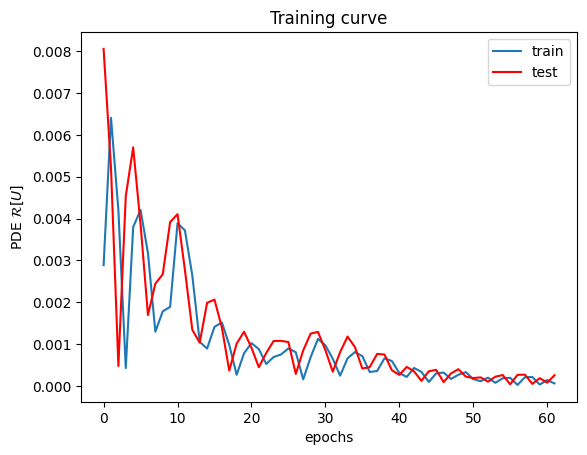

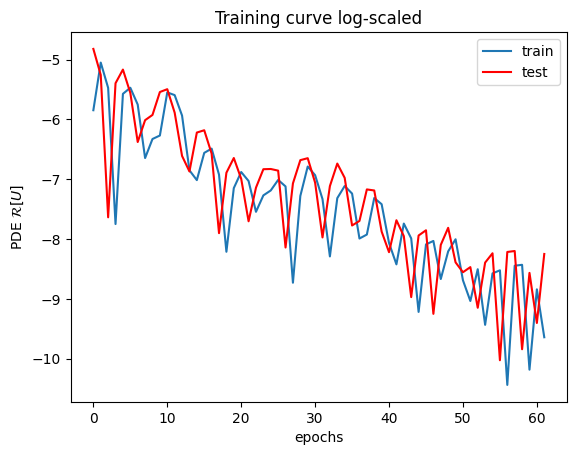

In [44]:
fig,axs=plt.subplots(1,1,
                     #figsize=(10,7)
                     )

#L_ts
axs.plot((L_tr),label="train")
axs.plot((L_ts),"r",label="test")
axs.set_title("Training curve")
axs.set_ylabel("PDE ${\cal{R}} [U]$")
axs.set_xlabel("epochs")
axs.legend()

fig,axs=plt.subplots(1,1,
                     #figsize=(10,7)
                     )
axs.set_title("Training curve log-scaled")
#L_ts
axs.plot(np.log(L_tr),label="train")
axs.plot(np.log(L_ts),"r",label="test")
axs.set_ylabel("PDE ${\cal{R}} [U]$")
axs.set_xlabel("epochs")
axs.legend()

## Poisson

$$ - \nabla \cdot ( a(x) \nabla u ) = f $$

### Solver

In [ ]:
from phi.torch.flow import *
class poisson_model(object):
  def __init__(self,field,dt,conductivity):
    self.field=field
    self.dt=dt
    self.conductivity=conductivity

  def step(self, v, dt):
    return diffuse.implicit(v, self.conductivity, self.dt)
args={"k":0.1}

In [ ]:
geo=UniformGrid(x=20, y=20,bounds=Box(x=1.0, y=1.0))
phi_w=Field( geo,values=tensor(0.0),
      boundary= {
          'x-': tensor(0.01),
          'x+': ZERO_GRADIENT,
          'y-': 0,
          'y+': 0
 })
phi_w



model=darcy_flow_model(phi_w,0.1)

NameError: name 'darcy_flow_model' is not defined

## Diffusion

$$ u_t - \nabla \cdot (D(x)\nabla u) = s     $$

In [115]:
from phi.torch.flow import *
#from phi.field import solve_linear
#from phi import math as math_phi
from phi.torch.flow import *

class diffusion_model(object):
  def __init__(self,field,dt,conductivity=0.3):
    self.field=field
    self.dt=dt
    self.conductivity=conductivity

  @jit_compile_linear
  def sharpen(self,x):
    return self.explicit_step(x)

  
  def explicit_step(self, v, dt):
    lap = laplace(v, 
                  weights=self.conductivity, 
                  #gradient=gradient, 
                  order=2, 
                  implicit=math.Solve,
                  #upwind=upwind,
                  correct_skew=False
                  )
    return v + dt*lap.with_extrapolation(v.boundary - v.boundary)  # remove constants from extrapolation
    #return diffuse.implicit(v, self.conductivity, self.dt)
  def step(self,v):
    #@jit_compile_linear
    def sharpen(x):
      return self.explicit_step(x,-self.dt)
    return math.solve_linear(sharpen, y=v, solve=Solve( x0=v) )



#@jit_compile_linear
#def momentum_eq(u, u_prev, dt, diffusivity=0.01):
#    diffusion_term = dt * diffuse.differential(u, diffusivity, correct_skew=False)
#    advection_term = dt * advect.differential(u, u_prev, order=1)
#    return u + advection_term + diffusion_term
#
#@jit_compile
#def implicit_time_step(v, dt):
#    v = math.solve_linear(momentum_eq, v, Solve(x0=v), u_prev=v, dt=-dt)
#    v, p = fluid.make_incompressible(v)
#    return v

In [116]:
geo=UniformGrid(x=50, y=50,bounds=Box(x=10.0, y=10.0))
phi_w=Field( geo,values=tensor(0.0),
      boundary= {
          'x-': tensor(0.005),
          'x+': ZERO_GRADIENT,
          'y-': 0,
          'y+': 0
 })
phi_w



model=diffusion_model(phi_w,0.1,0.1)

In [117]:
from phi.field import Grid, Field, laplace
for i in range(10):
    phi_w=model.step(phi_w)



In [118]:
phi_w.values.native("x,y").numpy()

array([[2.8036635e-03, 3.7558444e-03, 4.0926500e-03, ..., 4.0926500e-03,
        3.7558444e-03, 2.8036635e-03],
       [1.3456718e-03, 2.0759683e-03, 2.4050572e-03, ..., 2.4050572e-03,
        2.0759683e-03, 1.3456718e-03],
       [6.2723103e-04, 1.0358362e-03, 1.2495273e-03, ..., 1.2495273e-03,
        1.0358362e-03, 6.2723103e-04],
       ...,
       [1.9966962e-40, 3.4402158e-40, 4.1934697e-40, ..., 4.1934697e-40,
        3.4402158e-40, 1.9966962e-40],
       [5.7467250e-42, 9.4980010e-42, 1.0951147e-41, ..., 1.0951147e-41,
        9.4980010e-42, 5.7467250e-42],
       [1.1490647e-43, 1.8216880e-43, 2.0178698e-43, ..., 2.0178698e-43,
        1.8216880e-43, 1.1490647e-43]], dtype=float32)

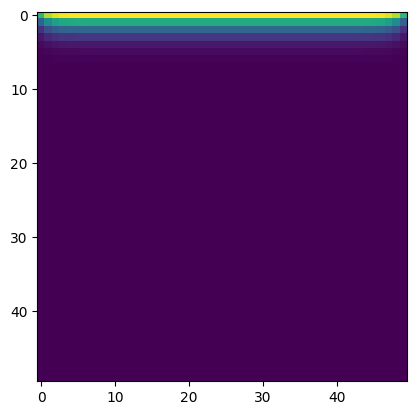

In [119]:
#plt.plot(phi_w_.values.native("x,y").numpy())
plt.imshow(phi_w.values.native("x,y").numpy())

In [124]:
import torch
from einops import rearrange
import matplotlib.pyplot as plt
from DL_models.PINNS.utils import *

class simple_cnn_model(torch.nn.Module):
  def __init__(self):
    super(simple_cnn_model,self).__init__()

    self.conv1=torch.nn.Conv2d(4, 32, (9,9), padding=4)
    self.conv2=torch.nn.Conv2d(32, 64, (9,9), padding=4)
    self.conv3=torch.nn.Conv2d(64, 1, (9,9), padding=4)
    self.act1=torch.nn.ReLU()
    self.act2=torch.nn.ReLU()
    self.act3=torch.nn.Tanh()
  def forward(self,x):
    x=self.act1(self.conv1(x))
    x=self.act2(self.conv2(x))
    x=self.act3(self.conv3(x))*0.01
    #x=torch.clamp(x, min=-0.5, max=0.5)
    return x[0]
  

#class composed_loss(object):

#from DL_models.PINNS.utils import x_grad

# def x_grad(u,x,i,n):
  """
  gradient of degree n wrt x for component i of u
  input:
  u and x are tensors with vectors object at dimension -1
  [b, n_vectors, vector_dimension]
  output:
  [b, n_vectors, input_vector_dimension]
  """


def composed_loss(p,x,conductivity=0.3):
  """
  u: [b x y p]
  x: [b x y (x y t)]
  """
  #p=rearrange(p,"b p x y-> b (x y) p")
  #x=rearrange(x,"b u x y-> b (x y) u")
  dpdt = x_grad(p,x,0,1)[...,2]
  x_1_grad = x_grad(p,x,0,1)[...,:2] # r
  con_tensor=torch.eye(2,2)*conductivity # [2, 2]
  k=torch.tensordot(con_tensor,x_1_grad,dims=([-1],[2]))
  x_2_grad = torch.sum(x_grad(p,x,0,1)[...,:2],axis=-1) # r

  return torch.abs(torch.mean(dpdt-k*x_2_grad))

In [125]:
st_model=simple_cnn_model().train()
optimizer=torch.optim.Adam(st_model.parameters(),lr=1e-4)

In [126]:
T=PINNS_based_SOL_trainer(
    field=phi_w,
    physical_model=diffusion_model,
    statistical_model=st_model,
    optimizer=optimizer,
    simulation_steps=50,
    time_step=0.5,
    loss=composed_loss
)

In [127]:
L=T.train(2)

epoch 0


KeyboardInterrupt: 

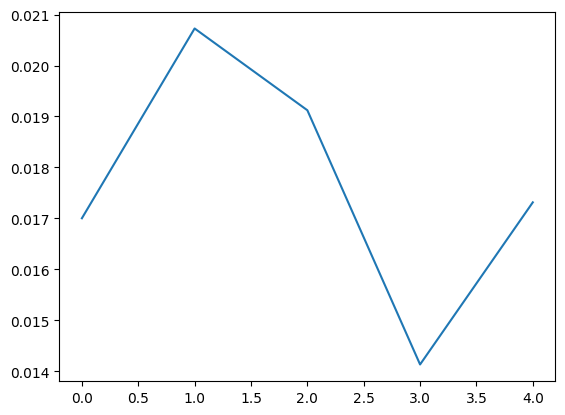

In [82]:
plt.plot(L)

## Reaction-diffusion

In [ ]:
from phi.torch.flow import *
from phi import math as math_phi
class diffusion_model(object):
  def __init__(self,field,dt,conductivity=0.3):
    self.field=field
    self.dt=dt
    self.conductivity=conductivity

  def step(self, v):
    lap = laplace(v, 
                  weights=self.conductivity, 
                  #gradient=gradient, 
                  order=2, 
                  implicit=math_phi.Solve,
                  #upwind=upwind,
                  #correct_skew=correct_skew
                  )
    return lap.with_extrapolation(v.boundary - v.boundary)  # remove constants from extrapolation
    #return diffuse.implicit(v, self.conductivity, self.dt)
args={"k":0.1}

In [ ]:
geo=UniformGrid(x=20, y=20,bounds=Box(x=1.0, y=1.0))
phi_w=Field( geo,values=tensor(0.0),
      boundary= {
          'x-': tensor(0.01),
          'x+': ZERO_GRADIENT,
          'y-': 0,
          'y+': 0
 })
phi_w



model=diffusion_model(phi_w,0.1,0.3)

In [94]:
#phi_w.geometry=UniformGrid(x=20, y=20,bounds=Box(x=1.0, y=1.0))
phi_w.downsample(4)

Field[(xˢ=13, yˢ=13)]

## 